# Model Training for Real Time Communication through AI for Specially Abled
### Loading the Dataset & Image Data Generation

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
# Training Datagen
train_datagen = ImageDataGenerator(rescale=1/255,zoom_range=0.2,horizontal_flip=True,vertical_flip=False)
# Testing Datagen
test_datagen = ImageDataGenerator(rescale=1/255)

In [4]:
# Training Dataset
x_train=train_datagen.flow_from_directory(r'C:\IBM\Dataset\training_set',target_size=(128,128), class_mode='categorical',batch_size=200,color_mode='grayscale')
# Testing Dataset
x_test=test_datagen.flow_from_directory(r'C:\IBM\Dataset\test_set',target_size=(128,128), class_mode='categorical',batch_size=200,color_mode='grayscale')

Found 15750 images belonging to 9 classes.
Found 2250 images belonging to 9 classes.


In [5]:
print("Len x-train : ", len(x_train))
print("Len x-test : ", len(x_test))

Len x-train :  79
Len x-test :  12


In [6]:
# The Class Indices in Training Dataset
x_train.class_indices

{'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6, 'H': 7, 'I': 8}

### Model Creation

In [7]:
# Importing Libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D,MaxPooling2D,Flatten,Dense

In [8]:
# Creating Model
model=Sequential()

In [9]:
# Adding Layers
model.add(Convolution2D(32,(3,3),activation='relu',input_shape=(128,128,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())

# Adding Hidden Layers
model.add(Dense(100,activation='relu'))
model.add(Dense(100,activation='relu'))
# Adding Output Layer
model.add(Dense(9,activation='softmax'))

In [10]:
# Compiling the Model
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [12]:
# Fitting the Model Generator
model.fit_generator(x_train,steps_per_epoch=len(x_train),epochs=3,validation_data=x_test,validation_steps=len(x_test))

C:\Users\nchel\AppData\Local\Temp\ipykernel_10068\1200875117.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(x_train,steps_per_epoch=len(x_train),epochs=3,validation_data=x_test,validation_steps=len(x_test))


Epoch 1/3
79/79 [==============================] - 50s 636ms/step - loss: 0.0222 - accuracy: 0.9938 - val_loss: 0.2424 - val_accuracy: 0.9662
Epoch 2/3
79/79 [==============================] - 50s 628ms/step - loss: 0.0162 - accuracy: 0.9956 - val_loss: 0.1718 - val_accuracy: 0.9724
Epoch 3/3
79/79 [==============================] - 50s 630ms/step - loss: 0.0136 - accuracy: 0.9973 - val_loss: 0.1376 - val_accuracy: 0.9756


### Saving the Model

In [13]:
model.save('asl_model_97_56.h5')

In [14]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [20]:
img=image.load_img(r'C:\IBM\Dataset\test_set\E\2.png',target_size=(128,128),color_mode='grayscale')

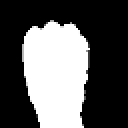

In [21]:
img

In [22]:
x=image.img_to_array(img)
x.ndim
x=np.expand_dims(x,axis=0)
x.ndim

4

In [23]:
pred=np.argmax(model.predict(x))

1/1 [==============================] - 0s 62ms/step


In [24]:
index=['A','B','C','D','E','F','G','H','I']
print(index[pred])

E


#### Open CV

In [29]:
import cv2